# UVIS G280 Simulator compared to published data
This notebook runs the simulator and compares the output to the data published in Wakeford et al. (2020, AJ)
We then plot the results to visually show the application of the simulator. 



In [1]:
import UVIS_precision_calculator as upc

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.gridspec as grid

Run the UVIS simulator on the file you want. We will follow the example in the UVIS precision calculator

In [2]:
data_folder = '' 

file_name = ['H41_ETC'] 

exposure_time = [190] 

orbits_in_transit = [2] 

no_of_transits = [2] 

wl = [2000,8000]

startw = 2000

endw = 8000

binlen = 100

out_name = '10nm_transmission'

upc.UVIS_simulation(data_folder,file_name,exposure_time,orbits_in_transit,no_of_transits,wl,startw,endw,binlen,out_name)


H41_ETC
exp time =  190
exp in transit =  23.0
exp per orbit =  12.0
precision/transit =  37.94149373653571
(60, 4)
Data has been saved as:  H41_ETC.UVIS_10nm_transmission_sim.txt


We will now load in that file and the measured data presented in Wakeford et al. (2020) for comparison

In [3]:
h41_sim = np.loadtxt('H41_ETC.UVIS_10nm_transmission_sim.txt', dtype=float)
wav_sim = h41_sim[:,0]
waverr_sim = h41_sim[:,1]
precision1_sim = h41_sim[:,2]
precision2_sim = h41_sim[:,3]


h41_data = np.loadtxt('H41_data_Wakeford2020.txt', dtype=float)
wav_data = h41_data[:,0]
h41_depth_marg = h41_data[:,1]
h41_deptherr_marg = h41_data[:,2]*1e4 #convert from % to ppm
h41_depth_jitter = h41_data[:,3]
h41_deptherr_jitter = h41_data[:,4]*1e4 #convert from % to ppm

In the next cell we will plot the two datasets from Wakeford et al. (2020) against the simulated data from this calculator. 

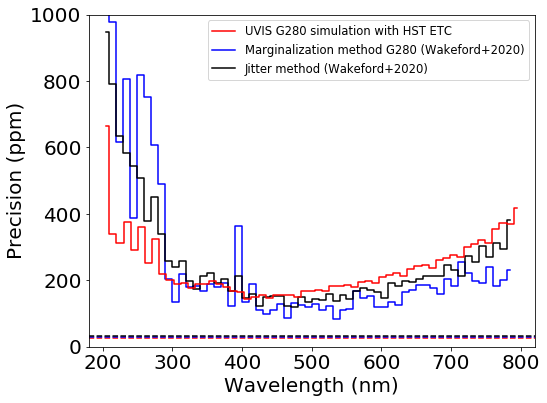

In [6]:
mpl.rc('font', size=20)
mpl.rcParams['figure.figsize'] = [8,6]
plt.figure()
position = grid.GridSpec(3,1, wspace=None)

plt.plot(wav_sim[1:], precision2_sim[1:], color='r', label='UVIS G280 simulation with HST ETC', drawstyle='steps-mid', zorder=6)
plt.plot(wav_data, h41_deptherr_marg, color='b', label='Marginalization method G280 (Wakeford+2020)', drawstyle='steps-mid')
plt.plot(wav_data, h41_deptherr_jitter, color='k', label='Jitter method (Wakeford+2020)', drawstyle='steps-mid')
plt.hlines(precision2_sim[0],100, 1000, color='r', linestyle='--')
plt.hlines(28,100, 1000, color='b', linestyle='--')
plt.hlines(33,100, 1000, color='k', linestyle='--')

plt.xlim(180,820)
plt.ylim(0,1000)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Precision (ppm)')
plt.legend(loc='upper right', fontsize='xx-small')

plt.tight_layout()


This shows that the simulator is a good approximation of the results presented in Wakeford et al. (2020) with some minor differences at the short and long wavelengths. Overall we expect this simulator to be used for proposal purposes only and is an approximation of the expected precision. 